In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# DATA PREPROCESSING

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [7]:
import re
import string

In [8]:
#convert upercase to lowercase
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
data["tweet"].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [9]:
#remove links
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))
data["tweet"].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
#remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)
data["tweet"].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [12]:
#remove numbers
data["tweet"] = data['tweet'].str.replace('\d+','',regex=True)
data["tweet"].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [13]:
#remove stopwords
!pip install nltk

In [14]:
import nltk

In [15]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [18]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [19]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [20]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building Vacabulary

In [21]:
from collections import Counter
vocab = Counter()

In [22]:
for sentence in data['tweet']:
    vocab.update(sentence.split())
len(vocab)

15949

In [23]:
data.shape

(7920, 3)

In [24]:
# data set is overfitting
# colomns = 15949 rows = 7920

In [25]:
tokens = [key for key in vocab if vocab[key] > 10]
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [26]:
len(tokens)

1145

In [27]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

# Divide Dataset

In [28]:
X = data['tweet']
y = data['label']

In [29]:
!pip install scikit-learn

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

1232    top gearapp avail us itun store need us credit...
3695    like klip goodnight klip sleep rest tuesday be...
2808                         im alway hit tri move screen
5636            good news phone fix bad news lost everyth
5728    lilithpgh apolog inconveni hear score new ipho...
                              ...                        
2632    fuck appl youv made phone break sneez liter st...
5631    thisispoc ugh im gonna give get new ipod scree...
7890    okay upgrad phone iphon doesnt headphoneaux ja...
4217    hi billgat hate appl like birthday get rt plea...
5051    love whole iphon exodu go atm android well tru...
Name: tweet, Length: 6336, dtype: object

In [31]:
X_test

551     sir pleas visit fiverr profil help profil than...
2864    jake new ps soni ps playstat consol new yay ch...
5400    need itun altern mainli music transfer purpos ...
5162    bansamsung grenad requir person samsungwow uft...
1731    sunday breakfast red berri muesli appl pineapp...
                              ...                        
192     birthday present came advanc thank much appl i...
5349    home kayrasu black blackandwhit iphon iphoneon...
3292    love combo instap samsung nailart colorclub we...
6296    rt alibak okay im go reestablish much love iph...
103     photo day eri pa car sign ilovey blackandwhit ...
Name: tweet, Length: 1584, dtype: object

In [32]:
y_train

1232    0
3695    0
2808    1
5636    1
5728    0
       ..
2632    1
5631    0
7890    1
4217    1
5051    1
Name: label, Length: 6336, dtype: int64

In [33]:
y_test

551     0
2864    0
5400    0
5162    1
1731    0
       ..
192     0
5349    0
3292    0
6296    0
103     0
Name: label, Length: 1584, dtype: int64

# Vectorization

In [34]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [35]:
vectorized_x_train = vectorizer(X_train, tokens)
vectorized_x_test = vectorizer(X_test, tokens)

In [36]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
y_train

1232    0
3695    0
2808    1
5636    1
5728    0
       ..
2632    1
5631    0
7890    1
4217    1
5051    1
Name: label, Length: 6336, dtype: int64

In [38]:
vectorized_x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
y_test

551     0
2864    0
5400    0
5162    1
1731    0
       ..
192     0
5349    0
3292    0
6296    0
103     0
Name: label, Length: 1584, dtype: int64

In [40]:
y_train.value_counts()
# this is an imbalanced dataset

0    4732
1    1604
Name: label, dtype: int64

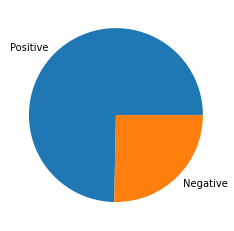

In [41]:
import matplotlib.pyplot as plt
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Handle imbalanced dataset

In [42]:
!pip install imbalanced-learn

In [43]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
vectorized_x_train_smt, y_train_smt = smt.fit_resample(vectorized_x_train, y_train)

print(vectorized_x_train_smt.shape, y_train_smt.shape)

(9464, 1145) (9464,)


In [45]:
y_train_smt.value_counts()

0    4732
1    4732
Name: label, dtype: int64

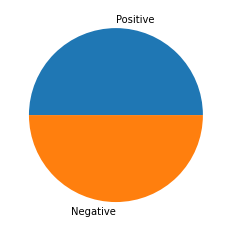

In [51]:
plt.pie(np.array([y_train_smt.value_counts()[0], y_train_smt.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [53]:
vectorized_x_train_smt

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.5224445, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [54]:
y_train_smt

0       0
1       0
2       1
3       1
4       0
       ..
9459    1
9460    1
9461    1
9462    1
9463    1
Name: label, Length: 9464, dtype: int64

In [56]:
vectorized_x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_test

551     0
2864    0
5400    0
5162    1
1731    0
       ..
192     0
5349    0
3292    0
6296    0
103     0
Name: label, Length: 1584, dtype: int64

# Model Training and Evaluation

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

#### Logistic Regression

In [64]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smt,y_train_smt)
y_train_predict = lr.predict(vectorized_x_train_smt)

In [65]:
y_train_predict #predicted values

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [66]:
y_train_smt #actual values

0       0
1       0
2       1
3       1
4       0
       ..
9459    1
9460    1
9461    1
9462    1
9463    1
Name: label, Length: 9464, dtype: int64

In [67]:
training_scores(y_train_smt, y_train_predict)

Training Scores:
	Accuracy = 0.939
	Precision = 0.915
	Recall = 0.968
	F1-Score = 0.941


In [71]:
y_test_predict = lr.predict(vectorized_x_test)
y_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
validation_scores(y_test_predict, y_test)
# training > testing --> slightly overfit

Testing Scores:
	Accuracy = 0.88
	Precision = 0.844
	Recall = 0.742
	F1-Score = 0.789


#### Naive Bayes

In [82]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smt,y_train_smt)
y_train_predict = mnb.predict(vectorized_x_train_smt)

In [83]:
y_train_predict

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [84]:
training_scores(y_train_smt, y_train_predict)

Training Scores:
	Accuracy = 0.907
	Precision = 0.872
	Recall = 0.953
	F1-Score = 0.911


In [85]:
y_test_predict = mnb.predict(vectorized_x_test)
y_test_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [86]:
validation_scores(y_test_predict, y_test)

Testing Scores:
	Accuracy = 0.871
	Precision = 0.905
	Recall = 0.7
	F1-Score = 0.789


#### Decision Tree

In [97]:
dtc = DecisionTreeClassifier()
dtc.fit(vectorized_x_train_smt,y_train_smt)
y_train_predict = dtc.predict(vectorized_x_train_smt)

In [98]:
training_scores(y_train_smt, y_train_predict)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [99]:
y_test_predict = dtc.predict(vectorized_x_test)
validation_scores(y_test_predict, y_test)

Testing Scores:
	Accuracy = 0.83
	Precision = 0.595
	Recall = 0.717
	F1-Score = 0.65


#### Random Forest

In [100]:
rfc = RandomForestClassifier()
rfc.fit(vectorized_x_train_smt,y_train_smt)
y_train_predict = rfc.predict(vectorized_x_train_smt)

In [101]:
training_scores(y_train_smt, y_train_predict)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [102]:
y_test_predict = rfc.predict(vectorized_x_test)
validation_scores(y_test_predict, y_test)

Testing Scores:
	Accuracy = 0.877
	Precision = 0.72
	Recall = 0.798
	F1-Score = 0.757


#### Support Vector Machine

In [104]:
svm = SVC()
svm.fit(vectorized_x_train_smt,y_train_smt)
y_train_predict = svm.predict(vectorized_x_train_smt)

In [105]:
training_scores(y_train_smt, y_train_predict)

Training Scores:
	Accuracy = 0.977
	Precision = 0.96
	Recall = 0.996
	F1-Score = 0.978


In [106]:
y_test_predict = svm.predict(vectorized_x_test)
validation_scores(y_test_predict, y_test)

Testing Scores:
	Accuracy = 0.895
	Precision = 0.834
	Recall = 0.784
	F1-Score = 0.808


In [107]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)
# used method is logistic regression